<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/b)_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering with the Wine Dataset


Hierarchical clustering is a popular unsupervised learning technique used to group data points into a hierarchy of clusters. This notebook demonstrates hierarchical clustering using the **Wine dataset**, which contains chemical analysis of wines from Italy.


### Step 1: Import Necessary Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline


### Step 2: Load and Explore the Wine Dataset

In [2]:

# Load the Wine dataset
wine = load_wine()
data = wine.data
feature_names = wine.feature_names

# Convert to DataFrame
df = pd.DataFrame(data, columns=feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Step 3: Preprocess the Data

In [3]:

# Scale the data for better performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


### Step 4: Perform Hierarchical Clustering

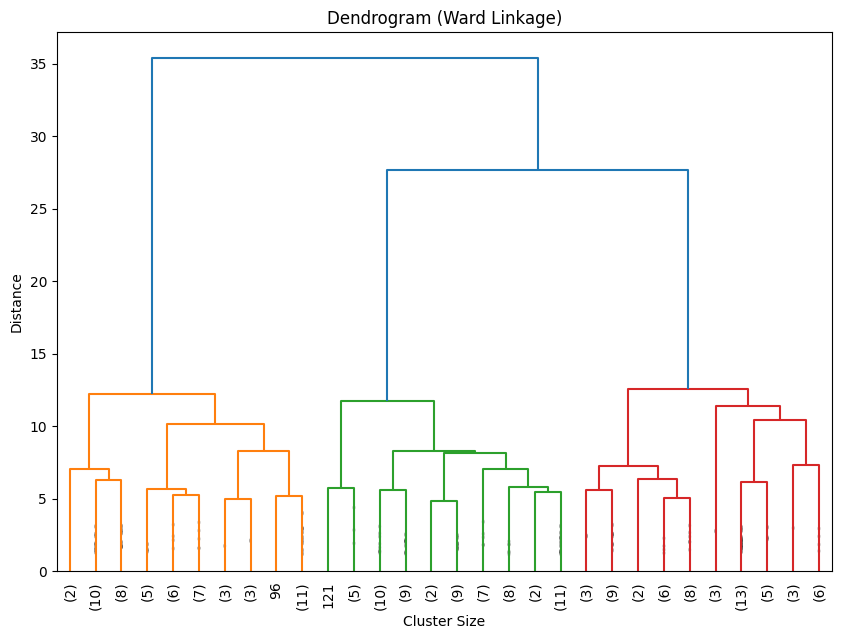

In [4]:

# Compute the linkage matrix using the 'ward' method
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


### Step 5: Visualize the Clusters

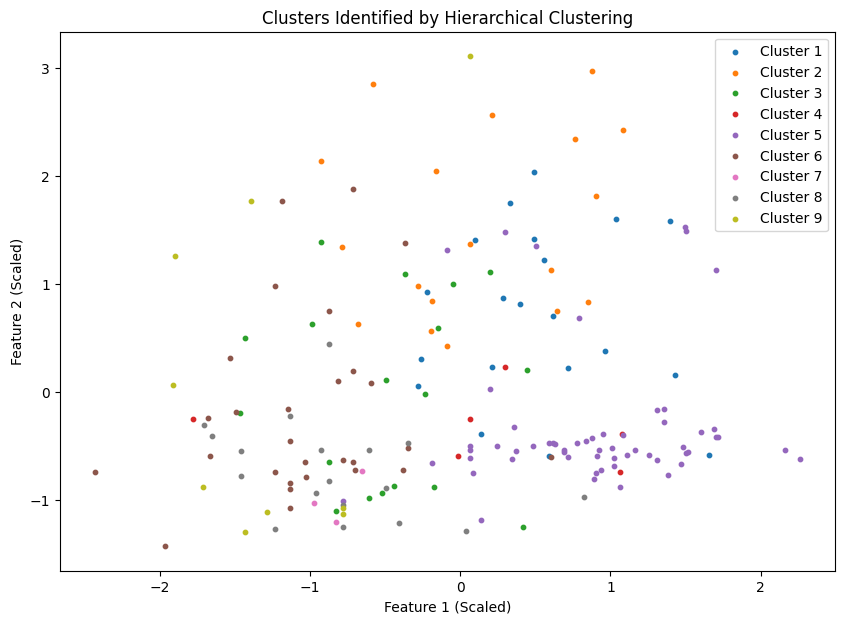

In [5]:

# Assign clusters using a distance threshold
threshold = 10
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Plot clusters (using first two features for simplicity)
plt.figure(figsize=(10, 7))
for cluster in np.unique(clusters):
    cluster_data = data_scaled[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', s=10)

plt.title("Clusters Identified by Hierarchical Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()


### Step 6: Experiment with Different Linkage Methods

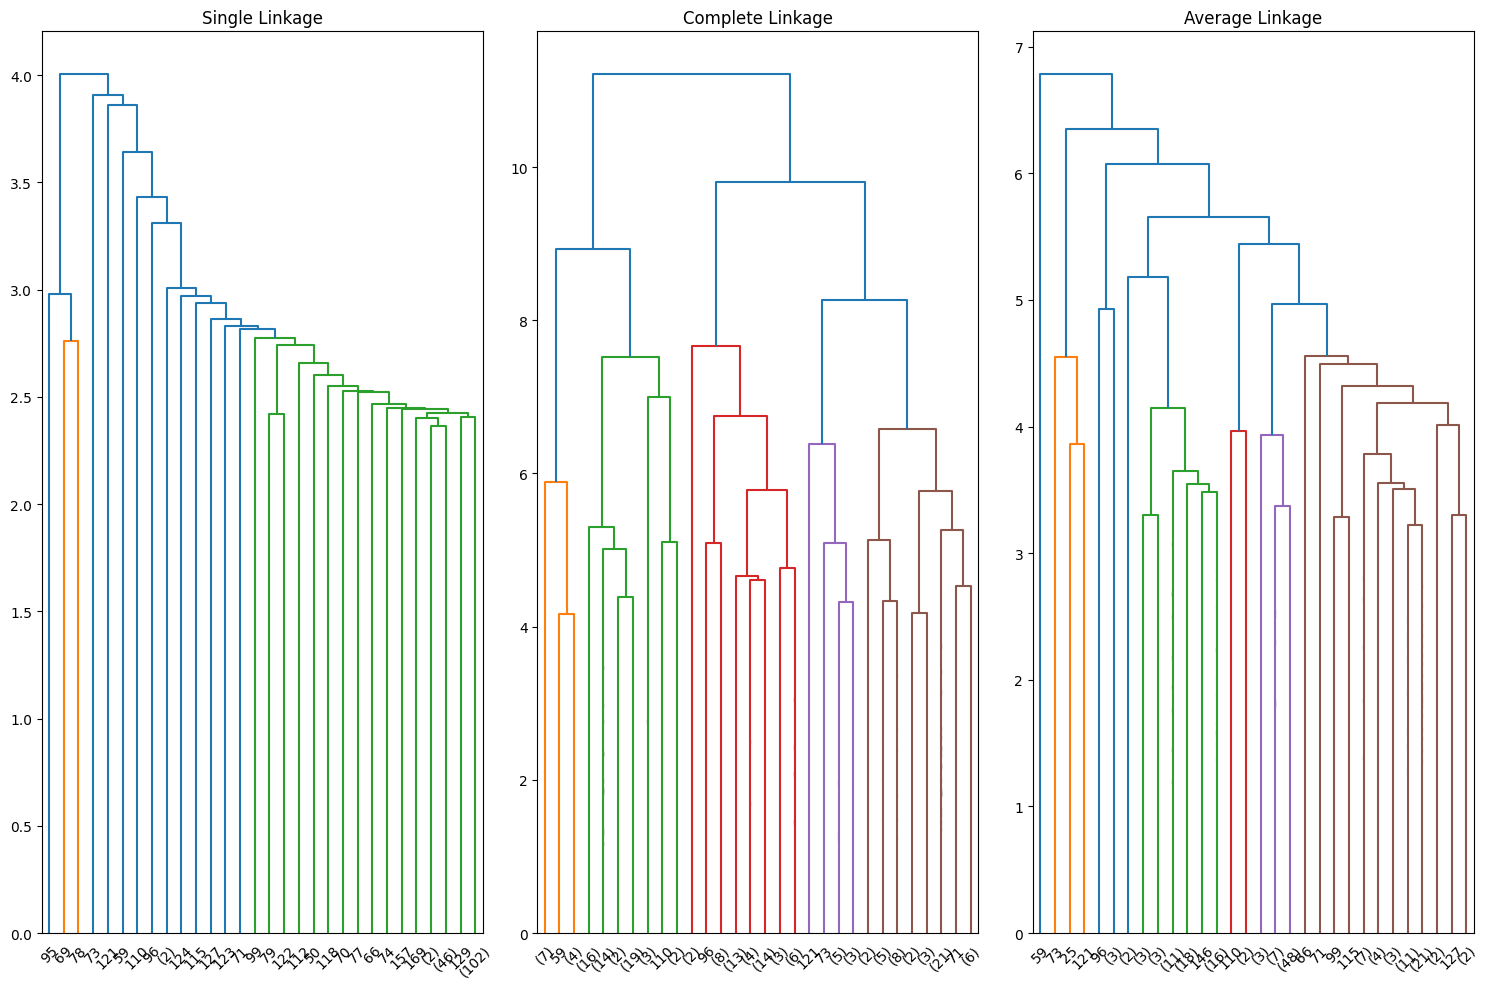

In [6]:

# Compare dendrograms for single, complete, and average linkage methods
methods = ['single', 'complete', 'average']
plt.figure(figsize=(15, 10))
for i, method in enumerate(methods):
    plt.subplot(1, 3, i + 1)
    linkage_matrix = linkage(data_scaled, method=method)
    dendrogram(linkage_matrix, truncate_mode='lastp', p=30, show_contracted=True)
    plt.title(f"{method.capitalize()} Linkage")

plt.tight_layout()
plt.show()


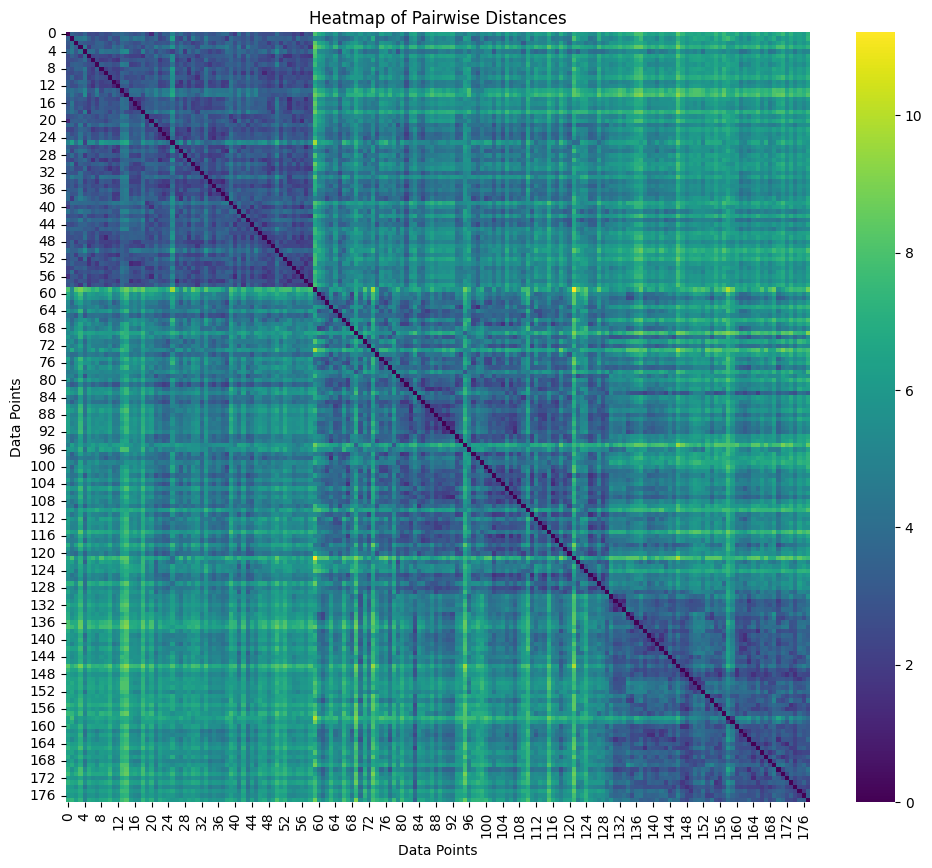

In [7]:
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# Compute pairwise distances
pairwise_distances = squareform(pdist(data_scaled))

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pairwise_distances, cmap='viridis')
plt.title("Heatmap of Pairwise Distances")
plt.xlabel("Data Points")
plt.ylabel("Data Points")
plt.show()

### Conclusion


In this notebook, we:
1. Used the Wine dataset for hierarchical clustering.
2. Scaled the data for better clustering performance.
3. Visualized the dendrogram to explore cluster hierarchies.
4. Compared different linkage methods to understand their impact.

This analysis demonstrates how hierarchical clustering can uncover meaningful patterns in chemical compositions of wines.
